In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

# remove missing rows
df = df.dropna()

# remove exact duplicate rows only
df = df.drop_duplicates()

# sample for speed
df = df.sample(100000, random_state=42)


In [3]:
df.shape

(100000, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0
252452,252452,336023,366789,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0
174039,174039,268330,268331,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0
384863,384863,28901,233483,What are some good books on marketing?,What are some of the best books ever written a...,1


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.sample(100000, random_state=42)


In [9]:
def preprocess(q):
    q=str(q).lower().strip()
    
    q=q.replace('%',' percent ')
    q=q.replace('@',' at ')
    q=q.replace('$',' dollar ')
    
    q=q.replace('[math]','')
    
    q=q.replace(',000,000,000 ','b ')
    q=q.replace(',000,000 ','m ')
    q=q.replace(',000 ','k ')
    
    import re
    q=re.sub(r'([0-9]+)000000000',r'\1b',q)
    q=re.sub(r'([0-9]+)000000',r'\1m',q)
    q=re.sub(r'([0-9]+)000',r'\1k',q)
    
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    q=re.sub(re.compile('<.*?>'),'',q)
    
    import string
    q=q.translate(str.maketrans('', '', string.punctuation))
    
    return q

<Axes: xlabel='is_duplicate'>

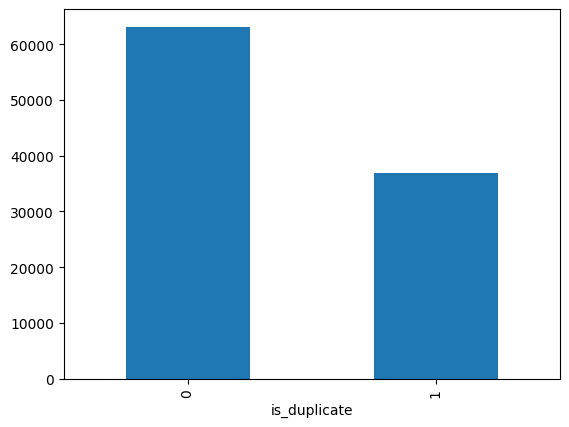

In [10]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())

In [12]:
np.unique(qid).shape[0]

166427

In [13]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [14]:
qid.shape[0]

200000

In [15]:
x=qid.value_counts()>1

In [16]:
x[x]

2559      True
30782     True
2561      True
4044      True
14376     True
          ... 
216655    True
146547    True
110598    True
74842     True
262390    True
Name: count, Length: 19298, dtype: bool

In [17]:
x[x].shape[0]

19298

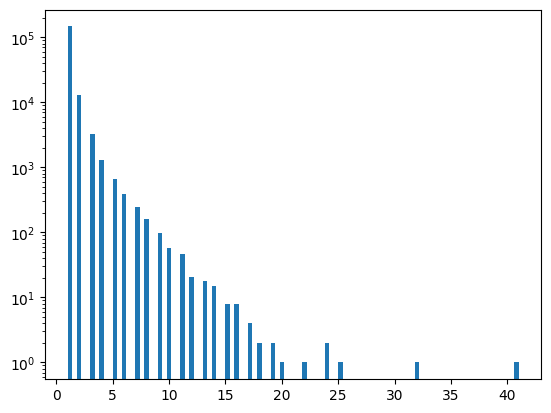

In [18]:
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [19]:
df.drop(columns=['id','qid1','qid2'],inplace=True)

In [20]:
df

,question1,question2,is_duplicate
67436,how do i utilize my gocash goibibo cash,what is cash buy and cash sell,0
308787,what are the best ways to increase the presenc...,humor what are some of the greatest examples o...,0
251427,did the big bang happen or not,what existed before the big bang,0
188027,what are my duties as a proactive citizen,what are the most important duties of every us...,0
245519,does masturbation affects our health or fertility,how harmful or unhealthy is masturbation,0
...,...,...,...
176203,who won world war i when did it happen,is another world war even possible,0
262277,what is the best graphics card for gaming,what is the best graphics card for pc gaming,1
246969,how do i hack a whatsapp of another user witho...,how do i hack a whatsapp account without havin...,1
67992,how much will it cost me to start a youtube ga...,how do i start a gaming channel on youtube,0


In [21]:
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [22]:
df['q1_num_words']=df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda row: len(row.split(" ")))

In [23]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [24]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1) + len(w2)

In [25]:
df['word_common']=df.apply(common_words,axis=1)

In [26]:
df['word_total']=df.apply(total_words,axis=1)

In [27]:
df

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
67436,how do i utilize my gocash goibibo cash,what is cash buy and cash sell,0,39,30,8,7,1,14
308787,what are the best ways to increase the presenc...,humor what are some of the greatest examples o...,0,55,64,11,12,6,20
251427,did the big bang happen or not,what existed before the big bang,0,30,32,7,6,3,13
188027,what are my duties as a proactive citizen,what are the most important duties of every us...,0,41,54,8,10,4,18
245519,does masturbation affects our health or fertility,how harmful or unhealthy is masturbation,0,49,40,7,6,2,13
...,...,...,...,...,...,...,...,...,...
176203,who won world war i when did it happen,is another world war even possible,0,38,34,9,6,2,15
262277,what is the best graphics card for gaming,what is the best graphics card for pc gaming,1,41,44,8,9,8,17
246969,how do i hack a whatsapp of another user witho...,how do i hack a whatsapp account without havin...,1,77,70,15,13,11,28
67992,how much will it cost me to start a youtube ga...,how do i start a gaming channel on youtube,0,58,42,12,9,6,21


In [28]:
df['word_share']=round(df['word_common']/df['word_total'],2)

In [29]:
df

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
67436,how do i utilize my gocash goibibo cash,what is cash buy and cash sell,0,39,30,8,7,1,14,0.07
308787,what are the best ways to increase the presenc...,humor what are some of the greatest examples o...,0,55,64,11,12,6,20,0.30
251427,did the big bang happen or not,what existed before the big bang,0,30,32,7,6,3,13,0.23
188027,what are my duties as a proactive citizen,what are the most important duties of every us...,0,41,54,8,10,4,18,0.22
245519,does masturbation affects our health or fertility,how harmful or unhealthy is masturbation,0,49,40,7,6,2,13,0.15
...,...,...,...,...,...,...,...,...,...,...
176203,who won world war i when did it happen,is another world war even possible,0,38,34,9,6,2,15,0.13
262277,what is the best graphics card for gaming,what is the best graphics card for pc gaming,1,41,44,8,9,8,17,0.47
246969,how do i hack a whatsapp of another user witho...,how do i hack a whatsapp account without havin...,1,77,70,15,13,11,28,0.39
67992,how much will it cost me to start a youtube ga...,how do i start a gaming channel on youtube,0,58,42,12,9,6,21,0.29


In [30]:
ndf1=df[['question1','question2']]
ndf2=df.drop(columns=['question1','question2'])

In [31]:
ndf1

,question1,question2
67436,how do i utilize my gocash goibibo cash,what is cash buy and cash sell
308787,what are the best ways to increase the presenc...,humor what are some of the greatest examples o...
251427,did the big bang happen or not,what existed before the big bang
188027,what are my duties as a proactive citizen,what are the most important duties of every us...
245519,does masturbation affects our health or fertility,how harmful or unhealthy is masturbation
...,...,...
176203,who won world war i when did it happen,is another world war even possible
262277,what is the best graphics card for gaming,what is the best graphics card for pc gaming
246969,how do i hack a whatsapp of another user witho...,how do i hack a whatsapp account without havin...
67992,how much will it cost me to start a youtube ga...,how do i start a gaming channel on youtube


In [32]:
ndf2

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
67436,0,39,30,8,7,1,14,0.07
308787,0,55,64,11,12,6,20,0.30
251427,0,30,32,7,6,3,13,0.23
188027,0,41,54,8,10,4,18,0.22
245519,0,49,40,7,6,2,13,0.15
...,...,...,...,...,...,...,...,...
176203,0,38,34,9,6,2,15,0.13
262277,1,41,44,8,9,8,17,0.47
246969,1,77,70,15,13,11,28,0.39
67992,0,58,42,12,9,6,21,0.29


In [33]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [34]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [35]:
pip install distance

Note: you may need to restart the kernel to use updated packages.


In [36]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    # Find the longest common substring
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0
    
    return length_features

In [37]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [38]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/opt/homebrew/Cellar/jupyterlab/4.5.1/libexec/lib/python3.14/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [39]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [40]:
ndf1=df[['question1','question2']]
ndf2=df.drop(columns=['question1','question2'])

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
cv=TfidfVectorizer(max_features=500)

In [43]:

questions=list(ndf1['question1'])+list(ndf1['question2'])

In [44]:
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [45]:

temp_df=pd.concat([pd.DataFrame(q1_arr,index=ndf1.index),pd.DataFrame(q2_arr,index=ndf1.index)],axis=1)
temp_df.shape

(100000, 1000)

In [46]:
q1_arr=""
q2_arr=""

In [47]:
temp_df=pd.concat([ndf2,temp_df],axis=1)

In [48]:
temp_df.shape

(100000, 1023)

In [49]:
temp_df['is_duplicate']

67436     0
308787    0
251427    0
188027    0
245519    0
         ..
176203    0
262277    1
246969    1
67992     0
64643     0
Name: is_duplicate, Length: 100000, dtype: int64

In [50]:
temp_df.columns = temp_df.columns.astype(str)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:

x_train,x_test,y_train,y_test=train_test_split(temp_df.drop(columns='is_duplicate'),temp_df['is_duplicate'],test_size=0.1,random_state=3)

In [53]:
temp_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,490,491,492,493,494,495,496,497,498,499
67436,0,39,30,8,7,1,14,0.07,0.333322,0.249994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
308787,0,55,64,11,12,6,20,0.30,0.399992,0.399992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
251427,0,30,32,7,6,3,13,0.23,0.666644,0.666644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
188027,0,41,54,8,10,4,18,0.22,0.666644,0.399992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
245519,0,49,40,7,6,2,13,0.15,0.333322,0.249994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176203,0,38,34,9,6,2,15,0.13,0.666644,0.399992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
262277,1,41,44,8,9,8,17,0.47,0.999975,0.799984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
246969,1,77,70,15,13,11,28,0.39,0.714276,0.714276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
67992,0,58,42,12,9,6,21,0.29,0.999975,0.666656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.661043


In [54]:
temp_df.columns = temp_df.columns.astype(str)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [56]:

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.798

In [57]:
import pickle
model_pkl_file = "RF.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)

In [58]:
model_pkl_file = "BOW.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(cv, file)

In [59]:
import pickle
with open("BOW.pkl", 'rb') as file:
    cv = pickle.load(file)


In [60]:
with open("rf.pkl", 'rb') as file:
    cv = pickle.load(file)


In [61]:
df=pd.read_csv("train.csv")
df=df.tail(204290)
df.dropna(inplace=True)
df.drop(columns=['id','qid1','qid2'],inplace=True)
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [62]:

df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()
df['q1_num_words']=df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda row: len(row.split(" ")))
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1) + len(w2)

df['word_common']=df.apply(common_words,axis=1)
df['word_total']=df.apply(total_words,axis=1)
df['word_share']=round(df['word_common']/df['word_total'],2)



In [63]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [64]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [65]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [66]:
ndf2=df.drop(columns=['question1','question2'])

In [78]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# combine all questions
questions = list(df['question1']) + list(df['question2'])

# create vectorizer
cv = CountVectorizer(max_features=2000)

# convert text to vectors
question_vectors = cv.fit_transform(questions).toarray()


# split into q1 and q2 arrays
q1_arr, q2_arr = np.vsplit(question_vectors, 2)


In [79]:
tenp_df=""
ndf1=""

In [80]:
ndf2 = ndf2.sample(15000, random_state=42)

cv = CountVectorizer(max_features=500)



In [81]:
q1_arr=""
q2_arr=""

In [82]:
temp_df=pd.concat([ndf2,temp_df],axis=1)

In [83]:
temp_df.columns = temp_df.columns.astype(str)

In [91]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_df.drop(columns='is_duplicate'),temp_df['is_duplicate'],test_size=0.1,random_state=3)

In [92]:
print(type(y_train))
print(y_train.shape)
print(np.isnan(y_train).sum())




<class 'pandas.core.series.Series'>
(100215,)
86716


In [93]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

ValueError: Input y contains NaN.

In [94]:
model_pkl_file = "RF.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)
    
model_pkl_file = "BOW.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(cv, file)